# Package

In [3]:
# PyTorch package and submodules
import torch
import torch.nn as nn
from torch.optim import SGD #gradient descent optimizer

# NumPy for math operations, and Pandas for processing tabular data.
import numpy as np
import pandas as pd

# Plotly plotting package
import plotly.graph_objects as go
import plotly.express as px

# Import matplotlib.pyplot to visualize tree models
import matplotlib.pyplot as plt

# Use imbalanced learn package
from imblearn.over_sampling import SMOTE

from genetic_selection import GeneticSelectionCV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score


from sklearn.model_selection import StratifiedKFold, train_test_split as tts, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier as XGBC
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [4]:
# Draw matrix fig using seaborn
def matrix_fig(title,y,yp):
  cm = confusion_matrix(y, yp)
  mtfig = sns.heatmap (cm, annot=True, fmt="d",cmap="YlGnBu", xticklabels=['0-12 hrs', '12-24 hrs', '>24 hrs'], yticklabels=['0-12 hrs', '12-24 hrs', '>24 hrs'])
  mtfig.set_title(title)
  mtfig.set_ylabel('True label')
  mtfig.set_xlabel('Predicted label')

  
# Evaluation of models
from sklearn.metrics import confusion_matrix
def evaluation(title, y_test, y_pred):
    target_map = {'0-12 hours': 0, '12-24 hrs': 1, '>24 hrs': 2}
    target_names = list(target_map.keys())
    cm = confusion_matrix(y_test, y_pred)
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for i in range(3):
        precision_score = cm[i,i] / sum(cm[:,i])
        recall_score = cm[i,i] / sum(cm[i,:])
        f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
        precision_scores.append(precision_score)
        recall_scores.append(recall_score)
        f1_scores.append(f1_score)
        print(f"Precision_score for class {target_names[i]}: {round(precision_score, 4)}")
        print(f"Recall_score for class {target_names[i]}: {round(recall_score, 4)}")
        print(f"F1_score for class {target_names[i]}: {round(f1_score, 4)}")
    accuracy = sum([cm[i,i] for i in range(3)]) / sum(sum(cm))
    print(f"{title}_Accuracy: {round(accuracy, 4)}")
    
    x = [f"Precision_{target_names[i]}" for i in range(3)] + [f"Recall_{target_names[i]}" for i in range(3)] + [f"F1_{target_names[i]}" for i in range(3)] + ["Accuracy"]
    y = precision_scores + recall_scores + f1_scores + [accuracy]
    fig, ax = plt.subplots()
    #dpi=500
    ax.bar(x, y)
    ax.set_xticklabels(x, rotation=90)
    ax.set_xlabel('Param')
    ax.set_ylabel('Score')
    ax.set_title(title)
    for a,b in zip(x,y):
        plt.text(a,b +0.01, '%.3f' %b, ha='center', va='bottom', fontsize=7)
    plt.show()


def predict_evaluation(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    MCC = matthews_corrcoef(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    fscore = f1_score(y_test, y_pred, average='macro')
    result={'accuracy':accuracy,
            'MCC':MCC,
            'precision':precision,
            'recall':recall,
            'fscore':fscore}
    return result

In [5]:
def roc_auc_fig(title, y_test, y_pred, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test.values, y_pred[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(8,6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


# Import Data

In [6]:
df = pd.read_csv("/Users/Siqi/Desktop/SPH6004/Group/3Step_1Line.csv")

In [7]:
df.head()

,Unnamed: 0,vent_duration,stay_id,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,...,glucose+24,sodium+24,chloride+24,hemoglobin+24,wbc+24,alt+24,ast+24,alp+24,bilirubin_total+24,pt+24
0,0,2.000000,37607624,9.1,0.6,145.0,145.0,103.0,7.6,1.7,...,79.5,145.0,104.0,7.15,1.50,21.0,21.0,72.0,0.50,12.20
1,1,4.000000,30515259,8.5,2.6,109.0,134.0,94.0,7.1,2.2,...,198.0,140.0,104.0,7.90,7.80,168.0,330.5,39.0,3.65,18.85
2,2,16.000000,33572547,8.2,1.4,100.0,139.0,111.0,8.5,0.1,...,142.0,134.0,106.0,9.00,0.10,13.0,25.0,77.0,1.20,14.30
3,3,15.000000,34776632,9.5,0.7,143.0,131.0,88.0,7.7,9.6,...,117.5,148.0,106.0,8.75,12.95,75.0,275.5,171.0,33.20,37.60
4,4,104.133333,36606626,8.7,0.7,107.0,143.0,113.0,8.1,2.8,...,85.0,141.0,109.0,9.40,3.70,17.0,20.0,78.0,1.40,12.40


In [8]:
# create a function to label the vent_duration as hours
def label_hours(x):
    if x <= 12:
        return '0-12 hours'
    elif x <= 24:
        return '12-24 hrs'
    else:
        return '>24 hrs'
df['vent_hours'] = df['vent_duration'].apply(label_hours)
df = df.drop(['Unnamed: 0', 'vent_duration','stay_id'], axis=1)

In [9]:
df.head()

,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,alt_48,ast_48,alp_48,...,sodium+24,chloride+24,hemoglobin+24,wbc+24,alt+24,ast+24,alp+24,bilirubin_total+24,pt+24,vent_hours
0,9.1,0.6,145.0,145.0,103.0,7.6,1.7,19.0,25.0,67.0,...,145.0,104.0,7.15,1.50,21.0,21.0,72.0,0.50,12.20,0-12 hours
1,8.5,2.6,109.0,134.0,94.0,7.1,2.2,34.0,39.0,216.0,...,140.0,104.0,7.90,7.80,168.0,330.5,39.0,3.65,18.85,0-12 hours
2,8.2,1.4,100.0,139.0,111.0,8.5,0.1,13.0,18.0,69.0,...,134.0,106.0,9.00,0.10,13.0,25.0,77.0,1.20,14.30,12-24 hrs
3,9.5,0.7,143.0,131.0,88.0,7.7,9.6,69.0,263.0,178.0,...,148.0,106.0,8.75,12.95,75.0,275.5,171.0,33.20,37.60,12-24 hrs
4,8.7,0.7,107.0,143.0,113.0,8.1,2.8,17.0,20.0,78.0,...,141.0,109.0,9.40,3.70,17.0,20.0,78.0,1.40,12.40,>24 hrs


In [10]:
feature_columns = df.columns[~df.columns.isin(['vent_hours'])]
target_column = df['vent_hours']

for i in feature_columns:
  df[i] = pd.to_numeric(df[i])

#df.replace({'outcome': {'False': 0, 'True': 1}})
#df['gender'].replace(to_replace = 'M', value = 1, inplace = True)

df.head()
#df.info()
#df.shape

,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,alt_48,ast_48,alp_48,...,sodium+24,chloride+24,hemoglobin+24,wbc+24,alt+24,ast+24,alp+24,bilirubin_total+24,pt+24,vent_hours
0,9.1,0.6,145.0,145.0,103.0,7.6,1.7,19.0,25.0,67.0,...,145.0,104.0,7.15,1.50,21.0,21.0,72.0,0.50,12.20,0-12 hours
1,8.5,2.6,109.0,134.0,94.0,7.1,2.2,34.0,39.0,216.0,...,140.0,104.0,7.90,7.80,168.0,330.5,39.0,3.65,18.85,0-12 hours
2,8.2,1.4,100.0,139.0,111.0,8.5,0.1,13.0,18.0,69.0,...,134.0,106.0,9.00,0.10,13.0,25.0,77.0,1.20,14.30,12-24 hrs
3,9.5,0.7,143.0,131.0,88.0,7.7,9.6,69.0,263.0,178.0,...,148.0,106.0,8.75,12.95,75.0,275.5,171.0,33.20,37.60,12-24 hrs
4,8.7,0.7,107.0,143.0,113.0,8.1,2.8,17.0,20.0,78.0,...,141.0,109.0,9.40,3.70,17.0,20.0,78.0,1.40,12.40,>24 hrs


# Correlation 

In [11]:
# Check correlation
corr = df.corr().abs()
filt_matrix = corr[((corr >= 0.5) | (corr <= -0.5)) & (corr !=1.00)]
plt.figure(figsize=(36,36),dpi = 480)
sns.heatmap(filt_matrix, annot=True, cmap="Reds")
plt.show()

In [12]:
# Select upper triangle of correlation matrix
upper_matrix = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Drop features with correlation greater than 0.75
to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] >= 0.75)]
print(to_drop)
df.drop(to_drop, axis=1, inplace=True)

['ast_48', 'calcium_24', 'creatinine_24', 'glucose_24', 'sodium_24', 'chloride_24', 'hemoglobin_24', 'wbc_24', 'alt_24', 'ast_24', 'alp_24', 'bilirubin_total_24', 'pt_24', 'calcium+24', 'creatinine+24', 'glucose+24', 'sodium+24', 'chloride+24', 'hemoglobin+24', 'wbc+24', 'alt+24', 'ast+24', 'alp+24', 'bilirubin_total+24', 'pt+24']


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# Feature Selection & TTS

In [13]:
# corr_matrix=df_norm.corr().abs()
# upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
# to_drop=[column for column in upper_triangle.columns if any(upper_triangle[column]>0.80)]
# data_select1=data_norm.drop(to_drop, axis=1)


# selector=VarianceThreshold(0)
# selector.fit(data_select1)
# selected_features=selector.get_support(indices=True)
# selected_column_names=data_select1.columns[selected_features].tolist()
# data_select2=data_select1[selected_column_names]

In [14]:
target_map = {'0-12 hours': 0, '12-24 hrs': 1, '>24 hrs': 2}


X_raw = df.columns[~df.columns.isin(['vent_hours','vent_duration','stay_id'])]
Y_raw = df['vent_hours'].map(target_map)   
##df['vent_hours'].map(target_map)


# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# Y_raw = le.fit_transform(Y_raw)

# # Check data balance 
# print("0-12 hours:", len(Y_raw[Y_raw=='0-12 hour']))
# print("12-24 hrs:", len(Y_raw[Y_raw == '12-24 hrs']))
# print(">24 hrs:", len(Y_raw[Y_raw == '>24 hrs']))


vent_hours_counts = df['vent_hours'].value_counts()
print(vent_hours_counts)


>24 hrs       791
0-12 hours    624
12-24 hrs     508
Name: vent_hours, dtype: int64


In [15]:
Xtrain, Xtest, Ytrain, Ytest = tts(df.iloc[:, :-1], Y_raw , test_size=0.2, random_state=1)

In [16]:
Ytrain.value_counts()

2    627
0    505
1    406
Name: vent_hours, dtype: int64

In [17]:
Ytest.value_counts()

2    164
0    119
1    102
Name: vent_hours, dtype: int64

# XGboost

In [27]:
dtrain = xgb.DMatrix(Xtrain, label=Ytrain)
dtest = xgb.DMatrix(Xtest, label=Ytest)

In [28]:
## Baseline
xgb_model = xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [29]:
predy = xgb_model.predict(Xtest)

##predy = xgb.predict(Xtest)

In [30]:
# Calculate accuracy
accuracy = accuracy_score(Ytest, predy)

# Calculate F1 score
f1 = f1_score(Ytest, predy, average='macro')

# Calculate MCC
mcc = matthews_corrcoef(Ytest, predy)

# Calculate precision
precision = precision_score(Ytest, predy, average='macro')

# Calculate recall
recall = recall_score(Ytest, predy, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("F1 score: {:.3f}".format(f1))
print("MCC: {:.3f}".format(mcc))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

####If you have a well-balanced dataset, you can use average='macro' instead.

Accuracy: 0.382
F1 score: 0.362
MCC: 0.046
Precision: 0.363
Recall: 0.362


              precision    recall  f1-score   support

           0       0.39      0.37      0.38       119
           1       0.25      0.24      0.24       102
           2       0.44      0.48      0.46       164

    accuracy                           0.38       385
   macro avg       0.36      0.36      0.36       385
weighted avg       0.38      0.38      0.38       385

[[44 23 52]
 [31 24 47]
 [37 48 79]]


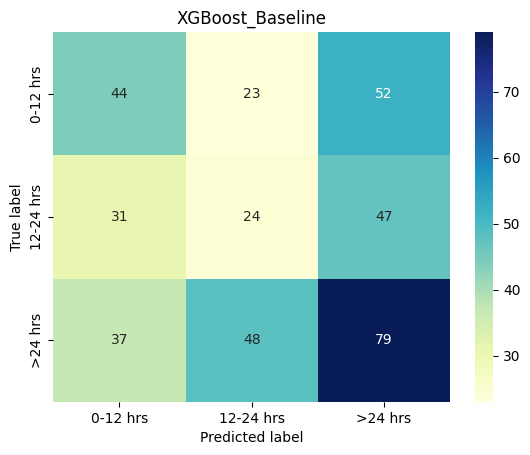

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, predy))
print (metrics.confusion_matrix(Ytest, predy))
matrix_fig('XGBoost_Baseline' ,Ytest,predy)

In [34]:
result=predict_evaluation(Ytest, predy)
result

{'accuracy': 0.38181818181818183,
 'MCC': 0.04574197365095547,
 'precision': 0.36310298217453746,
 'recall': 0.3622497779599645,
 'fscore': 0.36219850246032453}

Precision_score for class 0-12 hours: 0.3929
Recall_score for class 0-12 hours: 0.3697
F1_score for class 0-12 hours: 0.381
Precision_score for class 12-24 hrs: 0.2526
Recall_score for class 12-24 hrs: 0.2353
F1_score for class 12-24 hrs: 0.2437
Precision_score for class >24 hrs: 0.4438
Recall_score for class >24 hrs: 0.4817
F1_score for class >24 hrs: 0.462
XGBoost_Baseline_Accuracy: 0.3818


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


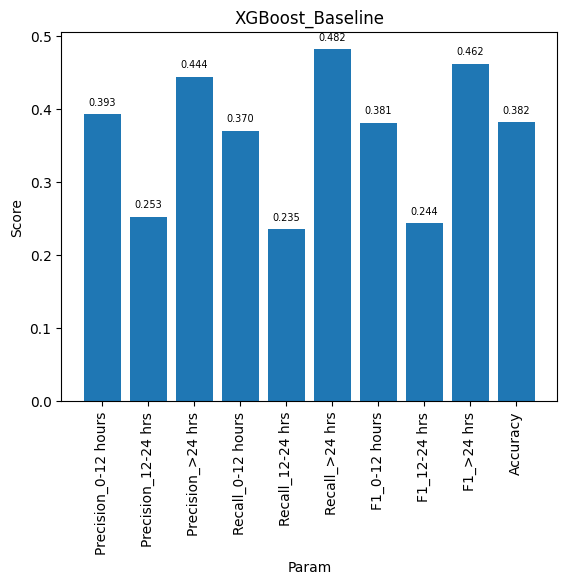

In [35]:
evaluation("XGBoost_Baseline", Ytest, predy)

In [36]:
# define the parameter grid
param_grid = param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# create the XGBClassifier object
xgb = XGBC(objective='multi:softmax')

# create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(Xtrain, Ytrain)

# print the best parameters
print(grid_search.best_params_)

{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [43]:

xgb_model2 = XGBC(colsample_bytree= 0.6, learning_rate= 0.05, max_depth= 3, n_estimators= 50, subsample= 1.0)
xgb_model2.fit(Xtrain, Ytrain)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [44]:
y_pred = xgb_model2.predict(Xtest)

##predy = xgb.predict(Xtest)

              precision    recall  f1-score   support

           0       0.38      0.32      0.35       119
           1       0.44      0.08      0.13       102
           2       0.45      0.74      0.56       164

    accuracy                           0.43       385
   macro avg       0.43      0.38      0.35       385
weighted avg       0.43      0.43      0.38       385

[[ 38   3  78]
 [ 27   8  67]
 [ 36   7 121]]


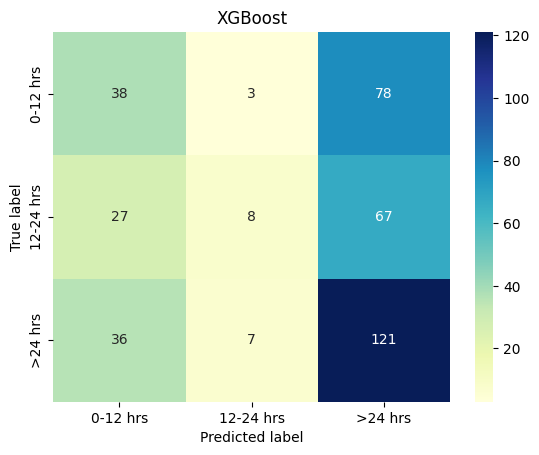

In [45]:

print(classification_report(Ytest, y_pred))
print (metrics.confusion_matrix(Ytest, y_pred))
matrix_fig('XGBoost' ,Ytest,y_pred)

In [46]:
result=predict_evaluation(Ytest, y_pred)
result

{'accuracy': 0.43376623376623374,
 'MCC': 0.08468701904343984,
 'precision': 0.4251897620839778,
 'recall': 0.378521327230079,
 'fscore': 0.3471928588207658}

Precision_score for class 0-12 hours: 0.386
Recall_score for class 0-12 hours: 0.3697
F1_score for class 0-12 hours: 0.3777
Precision_score for class 12-24 hrs: 0.3
Recall_score for class 12-24 hrs: 0.0588
F1_score for class 12-24 hrs: 0.0984
Precision_score for class >24 hrs: 0.4422
Recall_score for class >24 hrs: 0.6768
F1_score for class >24 hrs: 0.5349
XGBoost_Accuracy: 0.4182


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


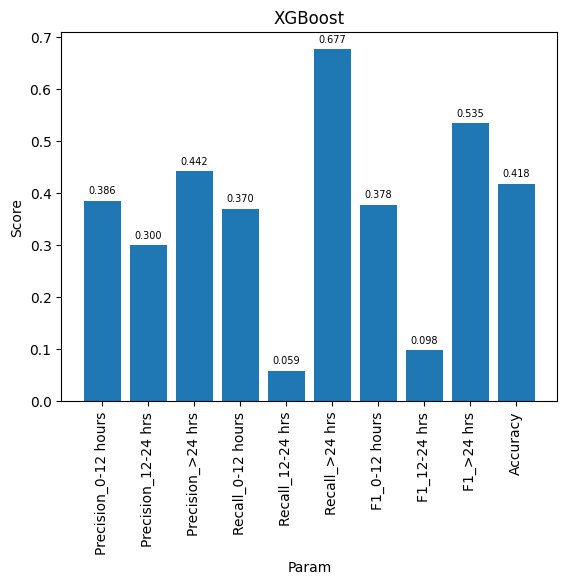

In [41]:
evaluation("XGBoost", Ytest, y_pred)

# Lightgbm

In [1]:
import lightgbm as lgb

In [18]:

model = lgb.LGBMClassifier(objective='multiclass', 
                             n_estimators=1000, 
                             max_depth=4, 
                             learning_rate=0.1, 
                             reg_lambda=1)
model.fit(Xtrain, Ytrain, verbose=False)

/Users/Siqi/Library/Python/3.7/lib/python/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(max_depth=4, n_estimators=1000, objective='multiclass',
               reg_lambda=1)

In [19]:
y1 = model.predict(Xtest)

##predy = xgb.predict(Xtest)

              precision    recall  f1-score   support

           0       0.36      0.35      0.36       119
           1       0.32      0.30      0.31       102
           2       0.45      0.46      0.46       164

    accuracy                           0.39       385
   macro avg       0.37      0.37      0.37       385
weighted avg       0.39      0.39      0.39       385

[[42 21 56]
 [33 31 38]
 [42 46 76]]
Precision_score for class 0-12 hours: 0.359
Recall_score for class 0-12 hours: 0.3529
F1_score for class 0-12 hours: 0.3559
Precision_score for class 12-24 hrs: 0.3163
Recall_score for class 12-24 hrs: 0.3039
F1_score for class 12-24 hrs: 0.31
Precision_score for class >24 hrs: 0.4471
Recall_score for class >24 hrs: 0.4634
F1_score for class >24 hrs: 0.4551
Lightgbm_BaseLine_Accuracy: 0.387


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


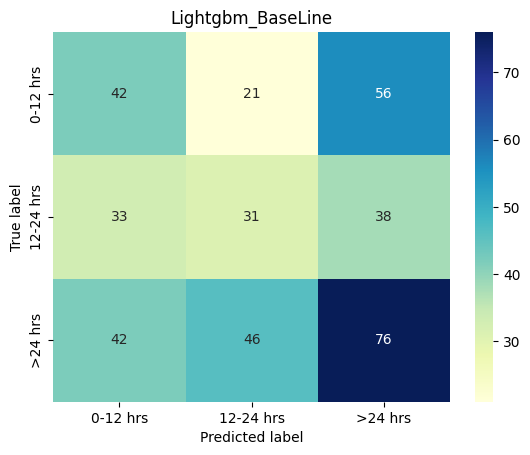

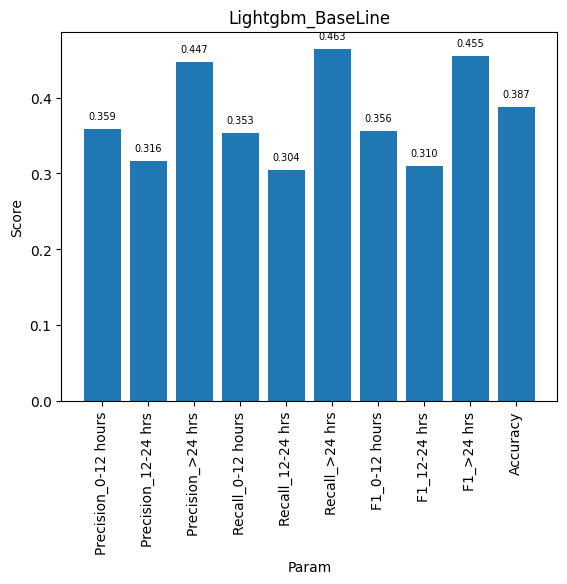

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, y1))
print (metrics.confusion_matrix(Ytest, y1))
matrix_fig('Lightgbm_BaseLine' ,Ytest,y1)
evaluation("Lightgbm_BaseLine", Ytest, y1)

In [21]:
result=predict_evaluation(Ytest, y1)
result

{'accuracy': 0.38701298701298703,
 'MCC': 0.05774020330752624,
 'precision': 0.3741199043720052,
 'recall': 0.37342579308146023,
 'fscore': 0.3736740079163707}

In [22]:
from lightgbm import LGBMClassifier

In [23]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 4, 5, 10],
    'learning_rate': [0.5, 0.1, 0.01, 0.001]
}

# create the LGBMClassifier object
lgbm = LGBMClassifier(objective='multiclass')

# create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5,verbose=3)

# fit the GridSearchCV object to the data
grid_search.fit(Xtrain, Ytrain)

# Print best parameters and corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.377 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.344 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.360 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.355 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.388 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=20;, score=0.377 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=20;, score=0.344 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=20;, score=0.360 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators

In [24]:
# Create a new LightGBM classifier with the best parameters
best_lgb_model = lgb.LGBMClassifier(learning_rate=grid_search.best_params_['learning_rate'],
                                    num_leaves=grid_search.best_params_['num_leaves'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    n_estimators=grid_search.best_params_['n_estimators'])

best_lgb_model.fit(Xtrain, Ytrain)

LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=10)

In [25]:
y3 = best_lgb_model.predict(Xtest)

              precision    recall  f1-score   support

           0       0.32      0.24      0.28       119
           1       0.31      0.04      0.07       102
           2       0.43      0.74      0.55       164

    accuracy                           0.40       385
   macro avg       0.35      0.34      0.30       385
weighted avg       0.36      0.40      0.34       385

[[ 29   3  87]
 [ 26   4  72]
 [ 36   6 122]]
Precision_score for class 0-12 hours: 0.3187
Recall_score for class 0-12 hours: 0.2437
F1_score for class 0-12 hours: 0.2762
Precision_score for class 12-24 hrs: 0.3077
Recall_score for class 12-24 hrs: 0.0392
F1_score for class 12-24 hrs: 0.0696
Precision_score for class >24 hrs: 0.4342
Recall_score for class >24 hrs: 0.7439
F1_score for class >24 hrs: 0.5483
Lightgbm_Accuracy: 0.4026


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


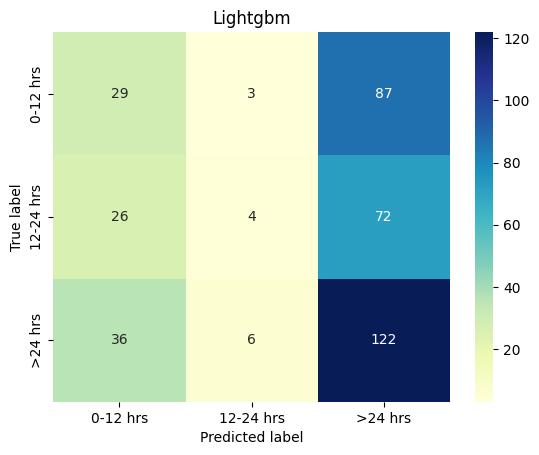

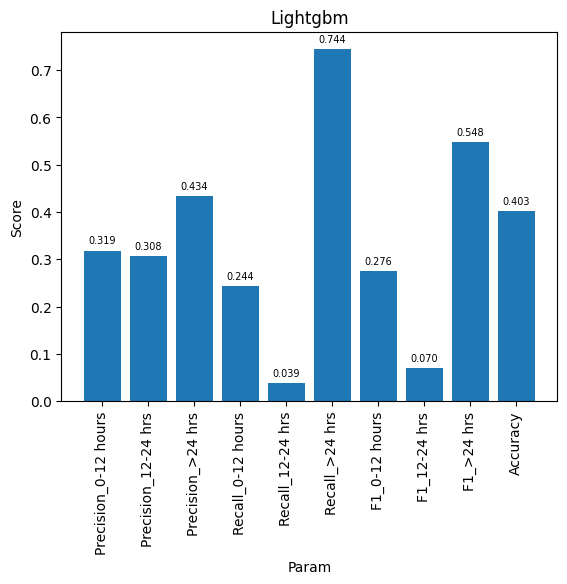

{'accuracy': 0.4025974025974026,
 'MCC': 0.018719564832544604,
 'precision': 0.35351244248041397,
 'recall': 0.34227186809683224,
 'fscore': 0.29802343344111787}

In [26]:
print(classification_report(Ytest, y3))
print (metrics.confusion_matrix(Ytest, y3))
matrix_fig('Lightgbm' ,Ytest,y3)
evaluation("Lightgbm", Ytest, y3)
result=predict_evaluation(Ytest, y3)
result

# RandomForest

In [27]:
rf_model = RandomForestClassifier()

# Set up parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
}

# Perform grid search using 5-fold cross validation
rf_grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
rf_grid_search.fit(Xtrain, Ytrain)

print("Best parameters:", rf_grid_search.best_params_)
print("Best score:", rf_grid_search.best_score_)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV 3/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.416 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.422 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.401 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.414 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.432 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.455 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.403 total t

In [28]:
best_rf_model = RandomForestClassifier(n_estimators=rf_grid_search.best_params_['n_estimators'],
                                        max_features=rf_grid_search.best_params_['max_features'],
                                        max_depth=rf_grid_search.best_params_['max_depth'],
                                        min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                        min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'])

# Train the model on the entire dataset
best_rf_model.fit(Xtrain, Ytrain)


RandomForestClassifier(max_depth=3, max_features='log2', min_samples_split=10,
                       n_estimators=50)

              precision    recall  f1-score   support

           0       0.44      0.23      0.30       119
           1       0.00      0.00      0.00       102
           2       0.44      0.88      0.59       164

    accuracy                           0.44       385
   macro avg       0.30      0.37      0.30       385
weighted avg       0.33      0.44      0.34       385

[[ 27   0  92]
 [ 14   0  88]
 [ 20   0 144]]
Precision_score for class 0-12 hours: 0.4426
Recall_score for class 0-12 hours: 0.2269
F1_score for class 0-12 hours: 0.3
Precision_score for class 12-24 hrs: nan
Recall_score for class 12-24 hrs: 0.0
F1_score for class 12-24 hrs: nan
Precision_score for class >24 hrs: 0.4444
Recall_score for class >24 hrs: 0.878
F1_score for class >24 hrs: 0.5902
Lightgbm_Accuracy: 0.4442


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Siqi/Libr

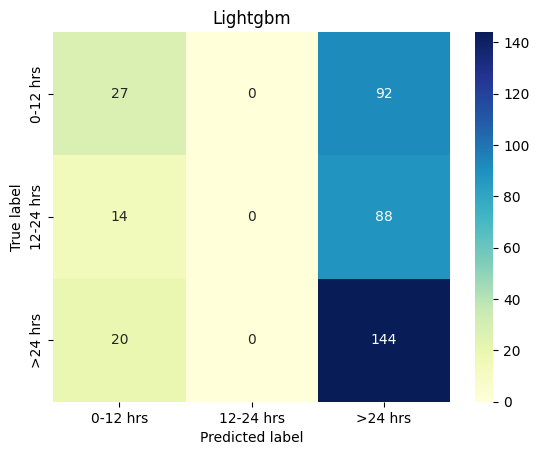

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


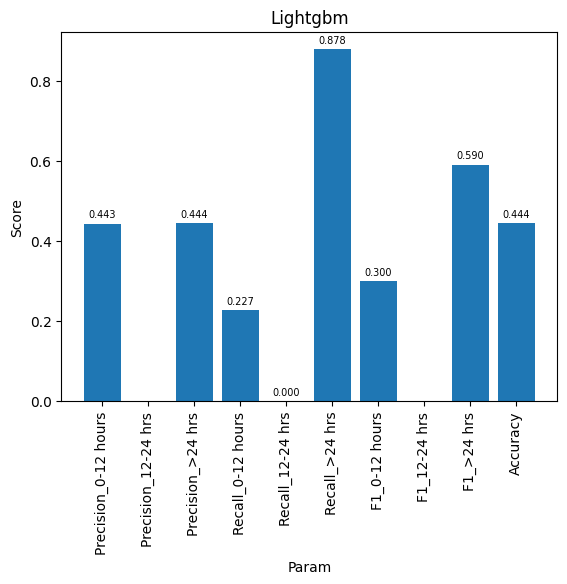

/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.44415584415584414,
 'MCC': 0.08796088147354847,
 'precision': 0.2956891317547055,
 'recall': 0.3683131789301086,
 'fscore': 0.29672131147540975}

In [29]:
y4 = best_rf_model.predict(Xtest)
print(classification_report(Ytest, y4))
print (metrics.confusion_matrix(Ytest, y4))
matrix_fig('Lightgbm' ,Ytest,y4)
evaluation("Lightgbm", Ytest, y4)
result=predict_evaluation(Ytest, y4)
result